In [0]:
%pip install xlrd

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
data_path = '/dbfs/FileStore/shared_uploads/vgunta15@gmail.com/Pistachio_28_Features_Dataset.xls'


In [0]:
import pandas as pd
df = pd.read_excel(data_path)

# Display the first few rows of the dataset
print(df.head())

    Area  Perimeter  Major_Axis  ...  Kurtosis_RG  Kurtosis_RB              Class
0  63391   1568.405    390.3396  ...       3.0576       2.9542  Kirmizi_Pistachio
1  68358   1942.187    410.8594  ...       2.1006       2.2152  Kirmizi_Pistachio
2  73589   1246.538    452.3630  ...       3.6856       4.1012  Kirmizi_Pistachio
3  71106   1445.261    429.5291  ...       2.8748       2.8953  Kirmizi_Pistachio
4  80087   1251.524    469.3783  ...       2.8813       2.7362  Kirmizi_Pistachio

[5 rows x 29 columns]


In [0]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset into a DataFrame
# Assuming your dataframe is named 'df'

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [0]:
from sklearn.decomposition import PCA

# Initialize PCA, let's start with 2 components for visualization
pca = PCA(n_components=2)

# Apply PCA
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])

# Concatenate the target variable for visualization
pca_df = pd.concat([pca_df, y], axis = 1)

# Display the first few rows of the PCA DataFrame
print(pca_df.head())


   Principal Component 1  Principal Component 2              Class
0               5.770754               4.072609  Kirmizi_Pistachio
1               2.123605               2.966556  Kirmizi_Pistachio
2               1.943006              -1.337886  Kirmizi_Pistachio
3               1.471295              -0.810587  Kirmizi_Pistachio
4              -0.579057              -2.257408  Kirmizi_Pistachio


In [0]:
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


Explained Variance Ratio: [0.31944802 0.19576862]


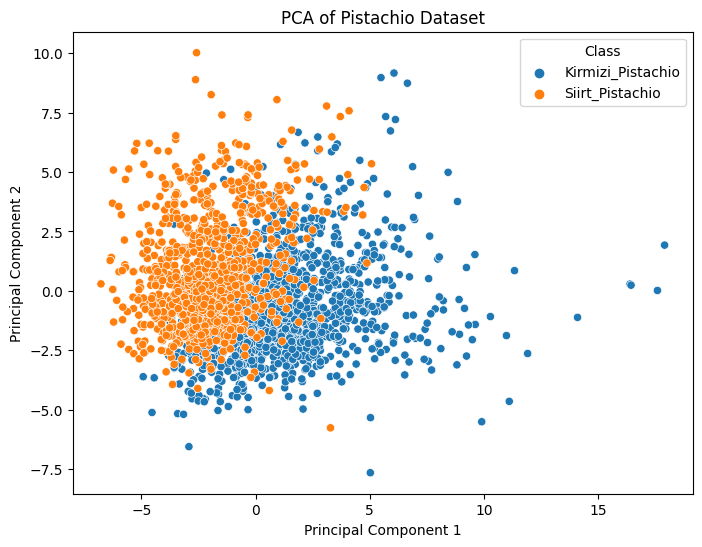

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Class', data=pca_df)
plt.title('PCA of Pistachio Dataset')
plt.show()


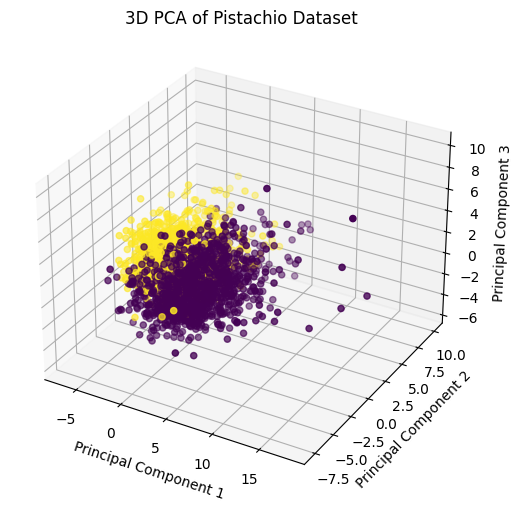

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import pandas as pd

# Initialize PCA for 3 components
pca = PCA(n_components=3)

# Apply PCA
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Adding the 'Class' column to pca_df for coloring the data points
pca_df['Class'] = df['Class']  # Assuming 'df' is your original DataFrame and 'Class' is the target column

# Map the class labels to a numeric value for color coding in the plot
class_labels = pca_df['Class'].astype('category').cat.codes

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3 principal components
ax.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], pca_df['Principal Component 3'], c=class_labels, cmap='viridis', marker='o')

# Setting labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Pistachio Dataset')

# Show the plot
plt.show()


In [0]:
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=1)
X_pca_1d = pca.fit_transform(X_scaled)

# Reconstruct from the 1-dimensional PCA
X_projected = pca.inverse_transform(X_pca_1d)


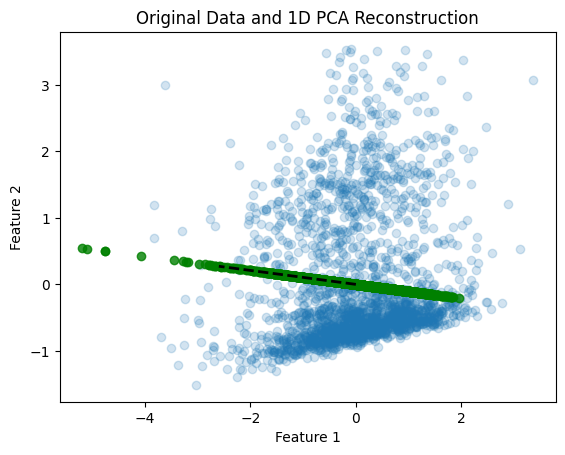

In [0]:
import matplotlib.pyplot as plt

# Assuming the first two features of your dataset are what you want to plot
feature1 = X_scaled[:, 0]  # Replace 0 with the appropriate column index for your feature
feature2 = X_scaled[:, 1]  # Replace 1 with the appropriate column index for your feature

# Plot original data
plt.scatter(feature1, feature2, alpha=0.2)

# Plot the 1D reconstruction
plt.scatter(X_projected[:, 0], X_projected[:, 1], alpha=0.8, color='green')

# Plot the principal component vectors
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '--k', linewidth=2)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data and 1D PCA Reconstruction')
plt.show()
